<a href="https://colab.research.google.com/github/mmovahed/Spectral_Methods/blob/main/IE/LeastSquares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least-squares weighted residual method

Consider the Fredholm integral equation:

$u(x)=e^{x} - x + \int_{0}^{1} xtu(t)$


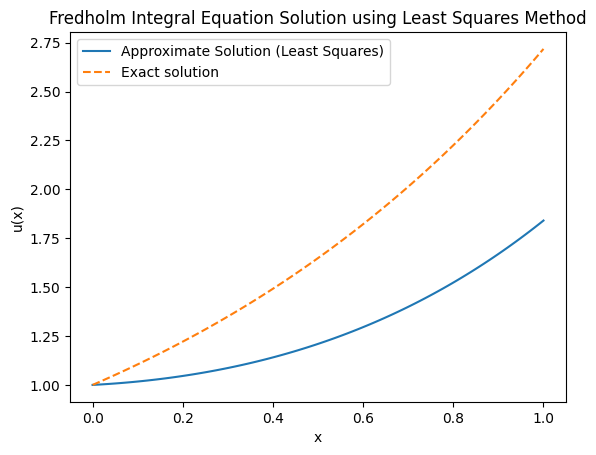

In [3]:
import numpy as np
import scipy.integrate as spi
import scipy.optimize as spo

# Define the basis functions
def basis_function(i, x):
    return x ** i

# Define the integral function for the integrand
def integral_function(x, c):
    return np.dot([x * t for t in np.linspace(0, 1, 100)], c)


# Define the residual function for least squares minimization
def residual(c, x_data, y_data):
    return y_data - (np.exp(x_data) - x_data + np.array([spi.quad(lambda x: integral_function(x, c), 0, 1)[0] for x in x_data]))

# Generate synthetic data points
np.random.seed(0)
x_data = np.linspace(0, 1, 100)
y_data = np.exp(x_data)  # Exact solution

# Initial guess for coefficients
initial_guess = np.zeros(100)

# Minimize the least squares objective function
result = spo.least_squares(residual, initial_guess, args=(x_data, y_data))

# Extract the optimized coefficients
c_optimized = result.x

# Define the approximate solution
def u_approx(x):
    return np.exp(x) - x + spi.quad(lambda t: x * t * np.dot([t ** i for i in range(len(c_optimized))], c_optimized), 0, 1)[0]

# Example usage: evaluate u_approx at some points
x_values = np.linspace(0, 1, 100)
u_values = [u_approx(x) for x in x_values]

# Plot the approximate solution
import matplotlib.pyplot as plt

plt.plot(x_values, u_values, label='Approximate Solution (Least Squares)')
plt.plot(x_data, y_data, label='Exact solution', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Fredholm Integral Equation Solution using Least Squares Method')
plt.show()